In [2]:
import numpy as np

# Question 1

$L(C,N,\lambda) = (\alpha C^p + (1-a)N^p)^{\frac{1}{p}} - \lambda(p_C C + p_N N -I)$

$TMS = \frac{dC}{dN}\bigg\rvert_{du=0} = -\frac{\partial L}{\partial C}/ \frac{\partial L}{\partial N} = \frac{\alpha C^{\rho-1}}{(1-\alpha)N^{\rho-1}}$

$C^* = \frac{I}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{\rho - 1}}}$

$N^* = \frac{I}{P_N + P_C(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{\frac{1}{\rho - 1}}}$

In [3]:
I = 100
PN = 1
PC = 2
alpha = 0.7
p = 0.5

In [4]:
def C_star(I, PN, PC, alpha = 0.7, p = 0.5):
    denominateur = PN*(PC/PN*(1-alpha)/alpha)**(-1/(p-1)) + PC

    return I/denominateur

def N_star(I, PN, PC, alpha = 0.7, p = 0.5):
    denominateur = PC*(PC/PN*(1-alpha)/alpha)**(1/(p-1)) + PN

    return I/denominateur

In [5]:
C_rep = C_star(I, PN, PC, alpha, p)
N_rep = N_star(I, PN, PC, alpha, p)

print(f'''
    La quantité demandée de bien a forte intensité de carbone (C) est de
    {round(C_rep, 2)} et celle des autres biens (N) est à {round(N_rep,2)}.
''')


    La quantité demandée de bien a forte intensité de carbone (C) est de
    36.57 et celle des autres biens (N) est à 26.87.



# Question 2

$\begin{aligned}
\eta_{C,I} = \frac{dC}{dI} \frac{I}{C}
\end{aligned}$

$\eta_{C,I} = \frac{1}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{\rho - 1}}}
\frac{I}{\frac{I}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{\rho - 1}}}}$

$\begin{aligned}
\eta_{C,I} = 1 \end{aligned}$



In [6]:
def Share(I, PN, PC, alpha = 0.7, p = 0.5, C = True):
    if C:
        nominateur = PC*C_star(I, PN, PC, alpha = 0.7, p = 0.5)
    
    else:
        nominateur = PN*N_star(I, PN, PC, alpha = 0.7, p = 0.5)
    
    return nominateur/I


In [7]:
C_part = Share(I, PN, PC, alpha, p, C = True)
N_part = Share(I, PN, PC, alpha, p, C = False)

print(f'''
    La part des biens à forte intensité de carbone (C) est de {round(C_part, 4)*100}%
    la part des autres biens (N) est de {round(N_part, 4)*100}%.
''')



    La part des biens à forte intensité de carbone (C) est de 73.13%
    la part des autres biens (N) est de 26.87%.



Le consommateur alloue une plus grande portion de son budget à des biens à forte intensité de carbone (C). Cela signifie que le clients à tendance à acheter plus de biens à forte intensité de carbone, ce qui va à l'encontre de l'objectif de réduire les GES pour le gouvernement.

# Question 3

## (a)

In [8]:
gamma = 0.1
PC_taxe = PC * (1+gamma)

C_rep_taxe = C_star(I, PN, PC_taxe, alpha, p)
N_rep_taxe = N_star(I, PN, PC_taxe, alpha, p)

C_part_taxe = Share(I, PN, PC_taxe, alpha, p)
N_part_taxe = Share(I, PN, PC_taxe, alpha, p, False)

print(f'''
    En incluant une taxe carbone, les biens à forte intensité de carbone représentent {round(C_part_taxe,4)*100}% soit environ {round(C_rep_taxe,2)} unités,
    les autres biens représentent désormais {round(N_part_taxe,4)*100}% soit environ {round(N_rep_taxe, 2)} unités.
''')


    En incluant une taxe carbone, les biens à forte intensité de carbone représentent 71.22% soit environ 32.37 unités,
    les autres biens représentent désormais 28.78% soit environ 28.78 unités.



## (b)

In [9]:
deltaC = C_part_taxe - C_part

print(f'La proportion des biens à forte intensité de carbone diminue de {round(deltaC, 4)*-100}% dans le budget.')

La proportion des biens à forte intensité de carbone diminue de 1.91% dans le budget.


## (c)

In [10]:
import matplotlib.pyplot as plt

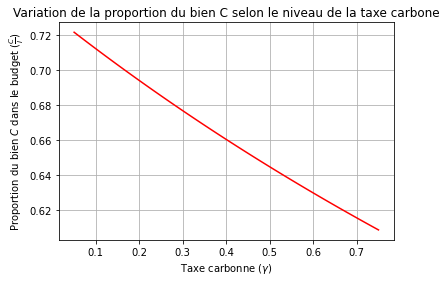

In [11]:
X = np.linspace(0.05, 0.75)
y = [Share(I, PN, PC * (1+gamma), alpha, p) for gamma in X]

plt.plot(X, y, 'r-')
plt.title('Variation de la proportion du bien C selon le niveau de la taxe carbone')
plt.xlabel(r'Taxe carbonne ($\gamma$)')
plt.ylabel(r'Proportion du bien $C$ dans le budget ($\frac{C}{I}$)')
plt.grid(True)
plt.show()

Ceci est cohérent avec le fait que la fonction d'utilité est de sous-type "Cobb-Douglas", en effet cela veux dire que son élasticité prix est de 1. C'est pourquoi la relation entre la taxe carbone et la proportion du bien C dans le budget est linéaire.

# Question 4

In [12]:
def v(I, PC, PN, alpha = 0.7, p = 0.5):
    return (alpha*C_star(I, PN, PC, alpha, p)**p + (1-alpha)*N_star(I, PN, PC, alpha, p)**p)**(1/p)


In [13]:
def slack(cmp, PC, PN, I, alpha, PC_taxe):
    return v(I, PC, PN, alpha, p) - v(I+cmp, PC_taxe, PN, alpha, p)

In [14]:
from scipy.optimize import bisect

cmp = bisect(slack, 0, 200, args=(PC, PN, I, alpha, PC_taxe))
def compens(PC, PC_taxe, PN, I, alpha):
    return bisect(slack, 0, I, args=(PC, PN, I, alpha, PC_taxe))

In [15]:
cmp = compens(PC, PC_taxe, PN, I, alpha)

In [16]:
slack(compens(PC, PC_taxe, PN, I, alpha), PC, PN, I, alpha, PC_taxe)

-3.836930773104541e-13

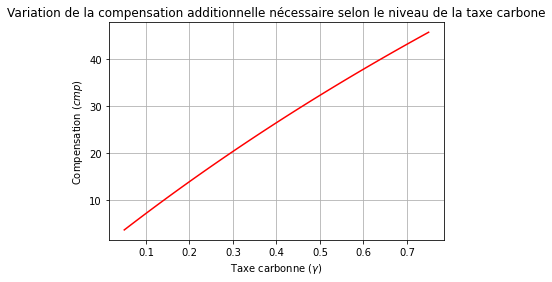

In [17]:
y = [compens(PC, PC*(1+gamma), PN, I, alpha) for gamma in X]

plt.plot(X, y, 'r-')
plt.title('Variation de la compensation additionnelle nécessaire selon le niveau de la taxe carbone')
plt.xlabel(r'Taxe carbonne ($\gamma$)')
plt.ylabel(r'Compensation ($cmp$)')
plt.grid(True)
plt.show()

Ceci est cohérent avec la précédente réponse, dans laquelle nous avons prouvé que l'élasticité linéaire provoquait une relation négative entre la taxe carbone et la quantité demandé de bien à forte intensité de carbone. Ainsi, on observe que lorsque la taxe carbone augmente, la compensation nécessaire à verser pour que l'utilité du consommateur demeure la même augmente de manière proportionnelle. Donc, lorsque le gouvernement augmente la taxe carbone il doit augmenter la compensation qu'il verse aux consommateurs de manière linéaire.

In [18]:
util_initiale = v(I, PC, PN)
util_finale = v(I+cmp, PC_taxe, PN)
print(util_initiale - util_finale)

-3.836930773104541e-13


L'utilité initiale et l'utilité après la compensation sont égales ce qui démontre que la compensation annule l'effet de la taxe carbone.

# Question 5

### <i>Rappel</i>:

$\begin{aligned}
\eta_{C,I} = \frac{dC}{dI} \frac{I}{C}
\end{aligned}$

$\eta_{C,I} = \frac{1}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}}
\frac{I}{\frac{I}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}}}$

$\begin{aligned}
\eta_{C,I} = 1 \end{aligned}$

In [19]:
C_cmp = C_star(I+cmp, PN, PC*(1+gamma))

In [20]:
(C_cmp-C_star(I, PN, PC*(1)))/C_star(I, PN, PC*(1))

-0.05164108977824778

Lorsque la compensation est versée, la demande de biens a forte intensité carbone diminue de 5,16%, ce qui signifie que les émissions de carbone seront réduites de 5,16% également.

# Question 6

In [21]:
prod_gouv = C_cmp*PC*gamma 
charge_gouv = cmp

impact_net = prod_gouv - charge_gouv
impact_net

-0.18633382909795415

Lorsque le gouvernement impose la taxe $\gamma $, son revenu net diminue d'environ 0.19$ par consommateur. Cela est dû au fait que le gouvernement doit aussi compenser le consommateur afin que ce dernier garde son utilité constante. L'effet net de la taxe sur le revenu du gouvernement est donc négatif.

# Question 7

In [22]:
def C_star(I, PN, PC, alpha = 0.7, p = 0.5):
    denominateur = PN*(PC/PN*(1-alpha)/alpha)**(-1/(p-1)) + PC

    return I/denominateur

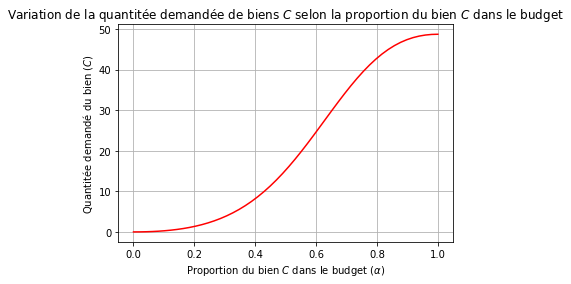

In [23]:
X = np.linspace(0.0001, 1)
y = [C_star(I+cmp, PN, PC*(1+gamma), alpha, p) for alpha in X]

plt.plot(X, y, 'r')

plt.title(r'Variation de la quantitée demandée de biens $C$ selon la proportion du bien $C$ dans le budget')
plt.xlabel(r'Proportion du bien $C$ dans le budget ($\alpha$)')
plt.ylabel(r'Quantitée demandé du bien ($C$)')

plt.grid(True)


Lorsque $\alpha$ augmente, ce qui signifie que la part du bien à forte intensité carbone dans le budget des consommateurs augmente, les émissions de carbone augmentent, car les consommateurs consomment plus du bien carbone pour le même budget.

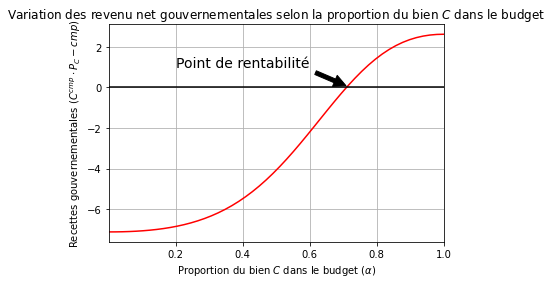

In [24]:
y_2 = [C_star(I+cmp, PN, PC*(1+gamma), alpha, p)*PC*gamma - cmp for alpha in X]

plt.plot(X, y_2, 'r')

plt.plot([-1, 1.5], [0, 0], c='black')

plt.xlim(X.min(), X.max())

plt.title(r'Variation des revenu net gouvernementales selon la proportion du bien $C$ dans le budget')
plt.xlabel(r'Proportion du bien $C$ dans le budget ($\alpha$)')
plt.ylabel(r'Recettes gouvernementales ($C^{cmp} \cdot P_C - cmp$)')

props = dict(facecolor='black', shrink=0.1)
plt.annotate('Point de rentabilité', xytext=(0.4, 1), xy=(0.72, 0), arrowprops=props, fontsize=14, ha="center")

plt.grid(True)


Le revenu net du gouvernement augmente lorsqu’alpha augmente, car leurs revenus de taxes augmentent puisque la consommation du bien carbone augmente, alors que les compensations qu'ils doivent verser augmentent aussi, mais moins rapidement. Ceci est dû au fait que l'utilité du consommateur augmente quand la proportion du bien carbone augmente. Ainsi, l'effet net sur les profits du gouvernements sont positifs lorsque $\alpha$ augmente. 

# Question 8

Text(0, 0.5, 'Quantitée demandé du bien ($C$)')

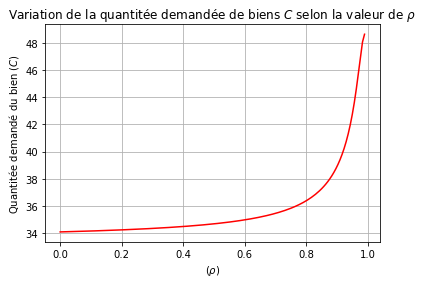

In [27]:
X = np.linspace(0, 0.99, 150)
y = [C_star(I+cmp, PN, PC*(1+gamma), p=rho) for rho in X]

plt.plot(X, y, 'r-')
plt.title(r'Variation de la quantitée demandée de biens $C$ selon la valeur de $\rho$')
plt.grid(True)
plt.xlabel(r'($\rho$)')
plt.ylabel(r'Quantitée demandé du bien ($C$)')

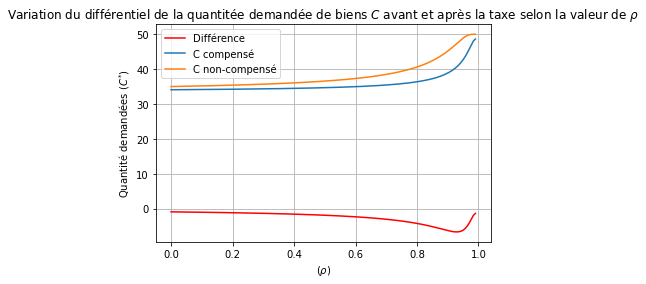

In [40]:
C_comp = [C_star(I+cmp, PN, PC*(1+gamma), p=rho) for rho in X]
C_ncomp = [C_star(I, PN, PC, p=rho) for rho in X]
y_2 = [C_star(I+cmp, PN, PC*(1+gamma), p=rho) - C_star(I, PN, PC, p=rho) for rho in X]

plt.plot(X, y_2, 'r-', label='Différence')
plt.plot(X, C_comp, label="C compensé")
plt.plot(X, C_ncomp, label="C non-compensé")
plt.title(r'Variation du différentiel de la quantitée demandée de biens $C$ avant et après la taxe selon la valeur de $\rho$')
plt.grid(True)
plt.xlabel(r'($\rho$)')
plt.ylabel(r'Quantité demandées ($C^{*}$)')
plt.legend()
plt.show()

Dans la fonction de quantité de $C$ dans le budget:

$\begin{aligned}
C^* = \frac{I}{P_C + P_N(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}}\end{aligned}$

Est affecté par la valeur $\rho$ à son dénominateur :

<div style="color:red">

$\begin{aligned}
(\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}}
\end{aligned}$
</div>

Lorsque $\rho$ augmente l'exposant $-\frac{1}{p - 1}$ se raproche de 0 tel que:

$\begin{aligned}
\lim_{\rho \to 1} (\frac{P_C}{P_N} \frac{1 - \alpha}{\alpha})^{-\frac{1}{p - 1}} = 1
\end{aligned}$


Lorsque $\rho$ augmente la valeur du dénominateur diminue, la valeur de la fonction de quantité optimale des biens à forte intensité de carbone ($C^{*}$) augmente alors. Ceci explique la forme convexe de la première courbe.


<br></br>

En contrepartie lorsqu'on compare la demande pour le bien $C$ lorsqu'il y a compensation et lorsqu'il n'y a pas compensation, on remarque que la quantité demandé du bien compensé réagit plus lentement et augmente plus rapidement que celle du bien non compensé notamment grace aux termes $P_C$ & $\frac{P_C}{P_N}$ du dénominateur. $\frac{P_C*(1+\gamma)}{PN}$ génère une augmentation plus rapide à la puissance de $-\frac{1}{p - 1}$, néanmoins le terme $P_C(1+\gamma)$ fait diminue la valeur de la fonction de manière constante.


# Question 9


La déclaration est fausse, car on doit évaluer la taille de la compensation versée avant de juger de l’efficacité de la taxe. Il est vrai que la taxe n’aura pas d’effet si on surcompense les consommateurs, car ils pourraient ainsi maintenir leur consommation du bien taxé constante. Dans le cas où le but de la taxe est de diminuer la consommation d’un bien polluant, nous observerons l’effet souhaité si les consommateurs ont été compensé du montant adéquat (revenu compensé). Il est nécessaire que l’effet total, composé de l’effet substitution et revenu, soit négatif. Cela fera en sorte que même si l’utilité du consommateur ait été gardé constante (demande compensée sur la même courbe d’indifférence que demande initiale), la diminution du bien taxé a quand même diminué (effet désiré). C’est pourquoi la déclaration du parti politique est imprécise, puisqu’elle ne prend pas en compte la taille de la compensation versée aux consommateurs pour juger l’efficacité de la taxe. 

Accéder au code source: 

<a href="https://github.com/felixpoirier1/Devoir1">  <img src="img/GitHub_logo.webp" width=40> </a>